In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # convert image to gray
        img = Image.open(filename).convert('L')
        img.save(filename)
        # load an image from file
        image = load_img(filename, target_size=(160, 128), grayscale=True)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + label
        image_label = []
        image_label.append(round(float(name.split('_')[0].split('-')[0]), 1))
        image_label.append(round(float(name.split('_')[0].split('-')[1]), 1))
        # or
        # image_label.append(round((float(name.split('_')[0].split('-')[0])) / (float(name.split('_')[0].split('-')[1])), 1))
        images.append(image)
        labels.append(image_label)
    return images, labels

In [3]:
# load images
directory = '../data/Patate_Pics'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels: %d' % len(images))

Loaded Images and labels: 212


In [4]:
images = np.array(images)
images /= 255

In [5]:
input_shape = images.shape

In [6]:
input_shape

(212, 160, 128, 1)

(<matplotlib.image.AxesImage at 0x1ed5689c978>, [0.4, 0.6])

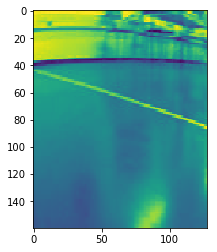

In [7]:
plt.imshow(images[0 ,: , : ,0 ]), labels[0]

In [8]:
images

array([[[[ 0.99215686],
         [ 0.99215686],
         [ 0.99607843],
         ..., 
         [ 0.98823529],
         [ 0.96862745],
         [ 0.89019608]],

        [[ 1.        ],
         [ 1.        ],
         [ 0.99215686],
         ..., 
         [ 0.53725493],
         [ 0.77254903],
         [ 0.83137256]],

        [[ 1.        ],
         [ 1.        ],
         [ 0.99215686],
         ..., 
         [ 0.53725493],
         [ 0.77254903],
         [ 0.83137256]],

        ..., 
        [[ 0.27450982],
         [ 0.27450982],
         [ 0.27450982],
         ..., 
         [ 0.36078432],
         [ 0.36470589],
         [ 0.36470589]],

        [[ 0.27450982],
         [ 0.27450982],
         [ 0.27450982],
         ..., 
         [ 0.36078432],
         [ 0.36470589],
         [ 0.36470589]],

        [[ 0.27450982],
         [ 0.27450982],
         [ 0.27843139],
         ..., 
         [ 0.36078432],
         [ 0.36470589],
         [ 0.36470589]]],


       [[[ 0.27058

In [9]:
labels

[[0.4, 0.6],
 [0.4, 0.7],
 [0.4, 0.6],
 [0.4, 0.2],
 [0.5, 0.4],
 [0.5, 0.4],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.4],
 [0.5, 0.5],
 [0.5, 0.7],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.7],
 [0.5, 0.7],
 [0.5, 0.5],
 [0.5, 0.8],
 [0.5, 0.5],
 [0.5, 0.6],
 [0.6, 0.4],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.9],
 [0.6, 0.4],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.4],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.9],
 [0.6, 0.6],
 [0.6, 0.5],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.8],
 [0.6, 0.8],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.6],
 [0.6, 0.8],
 [0.6, 0.8],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.9],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.9],
 [0.6, 0.9],
 [0.7, 0.6],
 [0.7, 0.6],
 [0.7, 0.6],
 [0.7, 0.7],
 [0.7, 0.6],
 [0.7, 0.7],
 [0.7, 0.7],
 [0.7, 0.8],
 [0.7, 0.7],
 [0.7, 0.9],
 [0.7, 0.6],

In [10]:
from keras.models import Model
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import tensorflow as tf

In [35]:
K.clear_session()

img_in = Input(shape=(160, 128, 1), name='img_in')

x = img_in

x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

flat = Flatten()(x)

x = Dense(256, activation='relu')(flat)
x = Dropout(0.2)(x)
out = Dense(2, activation='linear')(x)

model = Model(inputs=[img_in], outputs=[out])

#opti = Optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.2)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])







In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 160, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 128, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 16, 32)        0         
__________

In [37]:
h = model.fit(images, labels, batch_size=32, epochs=100, verbose=1, validation_split=0.3)

Train on 148 samples, validate on 64 samples
Epoch 1/100
148/148 [==============================] - 1s - loss: 0.3499 - mean_squared_error: 0.3499 - val_loss: 0.3836 - val_mean_squared_error: 0.3836
Epoch 2/100
148/148 [==============================] - 1s - loss: 0.2299 - mean_squared_error: 0.2299 - val_loss: 0.3633 - val_mean_squared_error: 0.3633
Epoch 3/100
148/148 [==============================] - 1s - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 4/100
148/148 [==============================] - 1s - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 5/100
148/148 [==============================] - 1s - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 6/100
148/148 [==============================] - 1s - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 7/100
148/148 [==========

148/148 [==============================] - 2s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 54/100
148/148 [==============================] - 2s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Epoch 55/100
148/148 [==============================] - 2s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0611 - val_mean_squared_error: 0.0611
Epoch 56/100
148/148 [==============================] - 2s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 57/100
148/148 [==============================] - 2s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 58/100
148/148 [==============================] - 2s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 59/100
148/148 [==============================] - 2s - loss: 0.0041 - mean_sq

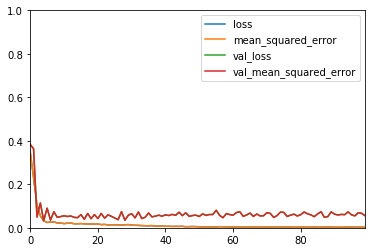

In [38]:
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [40]:
print(model.predict(images))



[[ 0.46450084  0.60472059]
 [ 0.42140633  0.69563609]
 [ 0.419709    0.59277844]
 [ 0.4257583   0.24963695]
 [ 0.50579983  0.40407747]
 [ 0.50572503  0.41524327]
 [ 0.51457548  0.5102396 ]
 [ 0.56161135  0.55288345]
 [ 0.51689726  0.41563919]
 [ 0.52071685  0.51485479]
 [ 0.53243154  0.71442604]
 [ 0.5301252   0.51309645]
 [ 0.51062655  0.49496484]
 [ 0.51284236  0.70494163]
 [ 0.52129143  0.69038171]
 [ 0.5031836   0.49538532]
 [ 0.50208539  0.77197087]
 [ 0.52453977  0.51796561]
 [ 0.49480912  0.5867852 ]
 [ 0.61896139  0.40943053]
 [ 0.60309917  0.69048756]
 [ 0.61645156  0.72055036]
 [ 0.61893338  0.81512713]
 [ 0.63092571  0.60746825]
 [ 0.59382695  0.68298638]
 [ 0.584481    0.6807611 ]
 [ 0.5882284   0.67158288]
 [ 0.62974012  0.87222481]
 [ 0.62024462  0.41932675]
 [ 0.63514066  0.50385898]
 [ 0.62861788  0.63323355]
 [ 0.65406668  0.71122086]
 [ 0.61432898  0.79206121]
 [ 0.61692011  0.42698041]
 [ 0.58410442  0.69238383]
 [ 0.59576976  0.75949156]
 [ 0.63074613  0.87608552]
 

In [41]:
labels

[[0.4, 0.6],
 [0.4, 0.7],
 [0.4, 0.6],
 [0.4, 0.2],
 [0.5, 0.4],
 [0.5, 0.4],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.4],
 [0.5, 0.5],
 [0.5, 0.7],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.7],
 [0.5, 0.7],
 [0.5, 0.5],
 [0.5, 0.8],
 [0.5, 0.5],
 [0.5, 0.6],
 [0.6, 0.4],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.9],
 [0.6, 0.4],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.4],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.9],
 [0.6, 0.6],
 [0.6, 0.5],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.8],
 [0.6, 0.8],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.6],
 [0.6, 0.8],
 [0.6, 0.8],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.5],
 [0.6, 0.6],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.7],
 [0.6, 0.8],
 [0.6, 0.9],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.7],
 [0.6, 0.9],
 [0.6, 0.9],
 [0.7, 0.6],
 [0.7, 0.6],
 [0.7, 0.6],
 [0.7, 0.7],
 [0.7, 0.6],
 [0.7, 0.7],
 [0.7, 0.7],
 [0.7, 0.8],
 [0.7, 0.7],
 [0.7, 0.9],
 [0.7, 0.6],

In [43]:
model.save('test_model.h5')